In this notebook, we add and visualize the output of a maxpooling layer in a CNN.

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

### Import the image

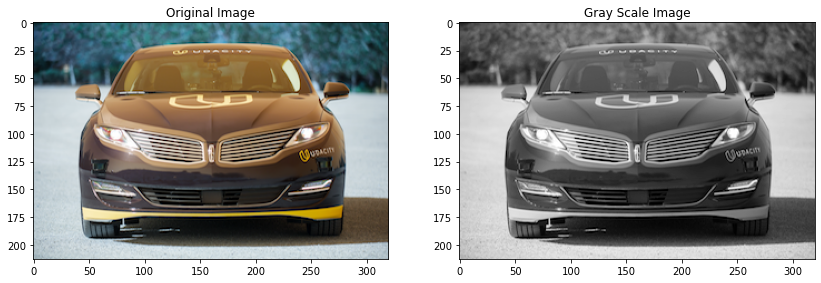

In [2]:
img_path = 'data/sdc.png'

# load color image 
bgr_img = cv2.imread(img_path)

#plot image
fig = plt.figure(figsize=(14, 14))
ax1 = fig.add_subplot(1, 2, 1)
ax1.title.set_text('Original Image')
plt.imshow(bgr_img)

# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
ax2 = fig.add_subplot(1, 2, 2)
ax2.title.set_text('Gray Scale Image')
plt.imshow(gray_img, cmap='gray')

plt.show()

### Define and visualize the filters

In [3]:
filter_vals = np.array([[-1, -1, 1, 1],
                      [-1, -1, 1, 1],
                      [-1, -1, 1, 1],
                      [-1, -1, 1, 1]])

print("Filter Shape:", filter_vals.shape)

Filter Shape: (4, 4)


In [4]:
# Defining four different filters, 
# all of which are linear combinations of the `filter_vals` defined above

filter1 = filter_vals
filter2 = -filter1
filter3 = filter1.T
filter4 = -filter1.T
filters = np.array([filter1, filter2, filter3, filter4])

print('Filter 1:\n', filter1)

Filter 1:
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


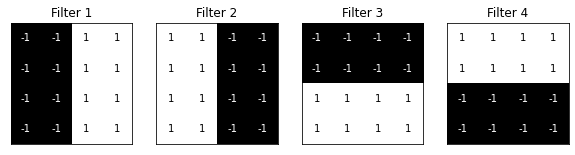

In [5]:
# visualizing four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

### Convert numpy filters to torch tensor

In [6]:
filters.shape

(4, 4, 4)

In [7]:
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
weight

tensor([[[[-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.]]],


        [[[ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.]]],


        [[[-1., -1., -1., -1.],
          [-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.]]],


        [[[ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.],
          [-1., -1., -1., -1.],
          [-1., -1., -1., -1.]]]])

# Define Convlutional Neural Network

The various layers that make up any neural network are documented [here](http://pytorch.org/docs/stable/nn.html).

Let us define three layers in Convolutional Neural Network
* Convolutional layer
* ReLU activation layer
* Max Pooling layer

In the next cell, we initialize a convolutional layer so that it contains all the created filters. Then add a maxpooling layer, [documented here](http://pytorch.org/docs/stable/_modules/torch/nn/modules/pooling.html), with a kernel size of (2x2) so we can see that the image resolution has been reduced after this step!

A maxpooling layer reduces the x-y size of an input and only keeps the most *active* pixel values. Below is an example of a 2x2 pooling kernel, with a stride of 2, applied to a small patch of grayscale pixel values; reducing the x-y size of the patch by a factor of 2. Only the maximum pixel values in 2x2 remain in the new, pooled output.

<img src='data/maxpooling_ex.png' height=50% width=50% />


Note that we are not training this network; we are initializing the weights in a convolutional layer so that we can visualize what happens at every layer after a forward pass!

In [8]:
k_height, k_width = weight.shape[2:]
model = nn.Sequential(nn.Conv2d(1,4, kernel_size=(k_height, k_width), bias=False),
                      nn.ReLU(),
                      nn.MaxPool2d(2, 2))

print(model)

model.state_dict()

Sequential(
  (0): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


OrderedDict([('0.weight',
              tensor([[[[-0.1785, -0.1952, -0.1466, -0.1624],
                        [ 0.2250, -0.2151,  0.1452, -0.1251],
                        [-0.0755,  0.2002,  0.1838, -0.0412],
                        [-0.1185, -0.0767,  0.0571,  0.0819]]],
              
              
                      [[[ 0.0402, -0.2051, -0.0161,  0.1591],
                        [-0.0239,  0.1186, -0.0466,  0.0959],
                        [-0.1029,  0.0885,  0.1481,  0.2264],
                        [-0.1875,  0.0999, -0.2270,  0.0678]]],
              
              
                      [[[-0.0700, -0.2387, -0.1989, -0.2120],
                        [-0.1922, -0.0134, -0.0290, -0.1716],
                        [ 0.1051,  0.1672, -0.0829, -0.0660],
                        [-0.0904, -0.1598,  0.1912,  0.0176]]],
              
              
                      [[[-0.1776, -0.2153, -0.1622,  0.1861],
                        [ 0.2036,  0.1754,  0.2199,  0.1549],
          

Update weights of conv layer with predefined filters

In [9]:
model[0].weight.data = weight
model.state_dict()

OrderedDict([('0.weight',
              tensor([[[[-1., -1.,  1.,  1.],
                        [-1., -1.,  1.,  1.],
                        [-1., -1.,  1.,  1.],
                        [-1., -1.,  1.,  1.]]],
              
              
                      [[[ 1.,  1., -1., -1.],
                        [ 1.,  1., -1., -1.],
                        [ 1.,  1., -1., -1.],
                        [ 1.,  1., -1., -1.]]],
              
              
                      [[[-1., -1., -1., -1.],
                        [-1., -1., -1., -1.],
                        [ 1.,  1.,  1.,  1.],
                        [ 1.,  1.,  1.,  1.]]],
              
              
                      [[[ 1.,  1.,  1.,  1.],
                        [ 1.,  1.,  1.,  1.],
                        [-1., -1., -1., -1.],
                        [-1., -1., -1., -1.]]]]))])

### Visualize the output of each filter

First, we'll define a helper function, `viz_layer` that takes in a specific layer and number of filters (optional argument), and displays the output of that layer once an image has been passed through.

In [10]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

#### ReLu activation

A ReLu function turns all negative pixel values in 0's (black). See the equation pictured below for input pixel values, `x`. 

<img src='data/relu_ex.png' height=50% width=50% />

Let's look at the output of a convolutional layer after a ReLu activation function is applied.

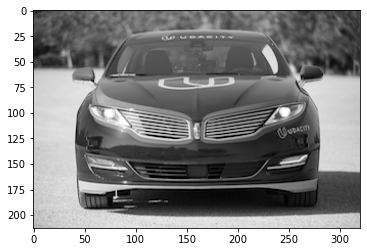

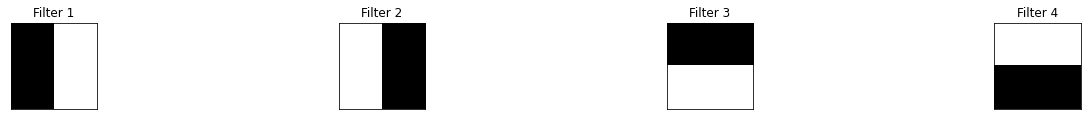

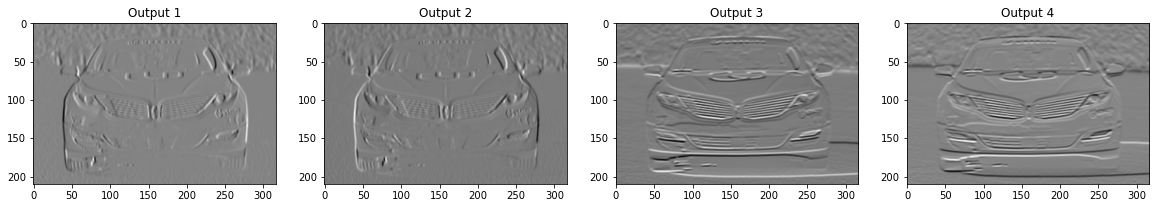

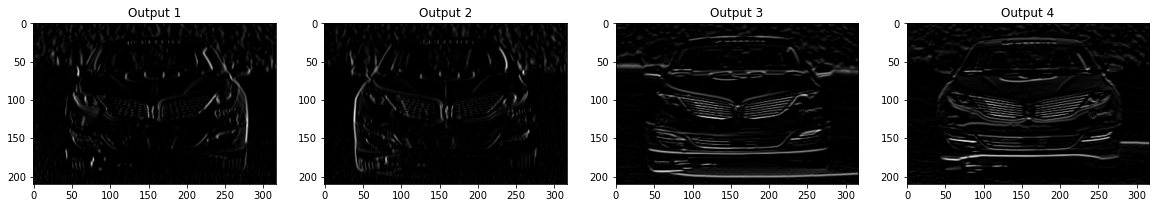

In [13]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# visualize the output of a conv layer
viz_layer(model[:1](gray_img_tensor))

# visualize the output of ReLU activation layer
viz_layer(model[:2](gray_img_tensor))

### Visualize the output of pooling layer

Then, take a look at the output of a pooling layer. The pooling layer takes in the feature maps as input (pictured above) and reduces the dimensionality of those maps, by some pooling factor, by constructing a new, smaller image of only the maximum (brightest) values in a given kernel area.

Take a look at the values on the x, y axes to see how the image has changed size.



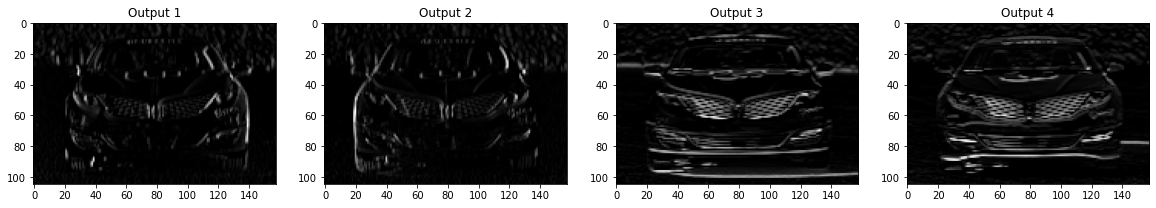

In [14]:
viz_layer(model[:3](gray_img_tensor))